In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


sns.set(style="whitegrid")

from src import forecast as fc

# Load processed dataset
df = pd.read_csv("../data/raw/ethiopia_fi_unified_data.csv")

In [2]:
# Prepare historical series
access_ts = fc.prepare_timeseries(df, "ACC_OWNERSHIP")
usage_ts = fc.prepare_timeseries(df, "USG_DIGITAL_PAYMENT")

In [7]:
# Baseline forecasts
access_baseline = fc.linear_forecast(access_ts)
usage_baseline = fc.linear_forecast(usage_ts)
access_baseline
usage_baseline

,forecast,ci_lower,ci_upper
2025,NaN,NaN,NaN
2026,NaN,NaN,NaN
2027,NaN,NaN,NaN


In [4]:
# Event-augmented forecasts
access_event = fc.event_augmented_forecast(access_ts, df)
usage_event = fc.event_augmented_forecast(usage_ts, df)

d:\week 10\ethiopia-fi-forecast\src\forecast.py:24: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  slope, intercept, r_value, p_value, std_err = stats.linregress(ts_clean.index, ts_clean.values)
d:\week 10\ethiopia-fi-forecast\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3824: RuntimeWarning: Mean of empty slice
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\week 10\ethiopia-fi-forecast\.venv\Lib\site-packages\numpy\_core\_methods.py:142: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


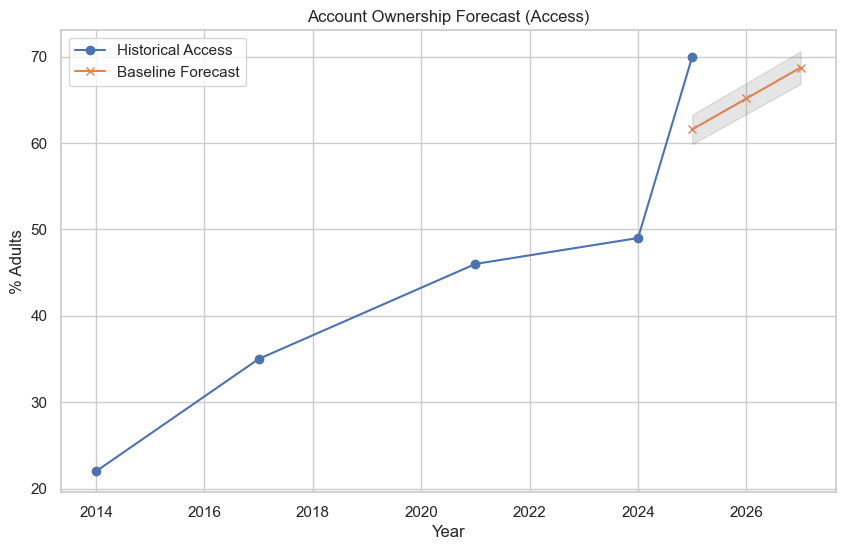

In [5]:
# Scenario analysis
scenarios = {
    "Pessimistic": fc.scenario_forecast(access_event, 0.8),
    "Base": fc.scenario_forecast(access_event, 1.0),
    "Optimistic": fc.scenario_forecast(access_event, 1.2)
}

# -----------------------
# Placeholder Plots
# -----------------------
plt.figure(figsize=(10,6))
plt.plot(access_ts.index, access_ts.values, marker="o", label="Historical Access")
plt.plot(access_baseline.index, access_baseline["forecast"], marker="x", label="Baseline Forecast")
plt.fill_between(access_baseline.index, access_baseline["ci_lower"], access_baseline["ci_upper"], color="gray", alpha=0.2)
plt.title("Account Ownership Forecast (Access)")
plt.xlabel("Year")
plt.ylabel("% Adults")
plt.legend()
plt.show()

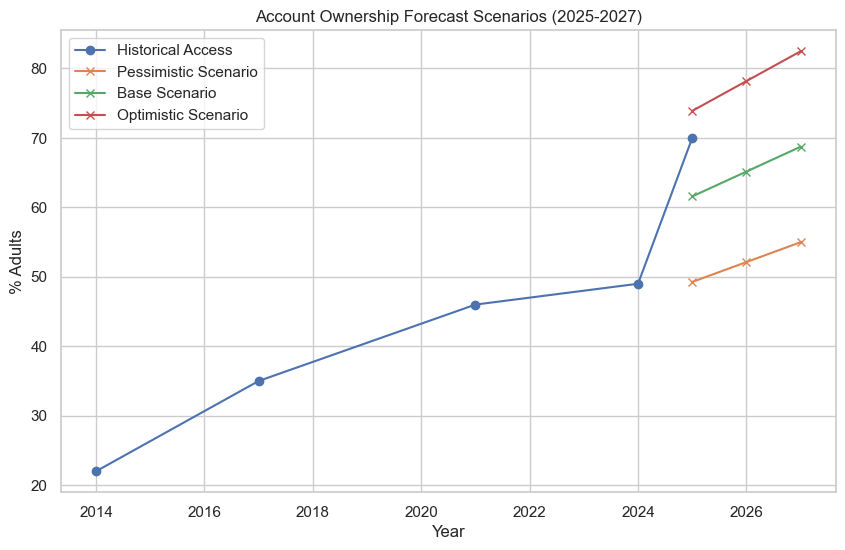

In [6]:
# Scenario visualization
plt.figure(figsize=(10,6))
plt.plot(access_ts.index, access_ts.values, marker="o", label="Historical Access")
for scen_name, scen_df in scenarios.items():
    plt.plot(scen_df.index, scen_df["forecast"], marker="x", label=f"{scen_name} Scenario")
plt.title("Account Ownership Forecast Scenarios (2025-2027)")
plt.xlabel("Year")
plt.ylabel("% Adults")
plt.legend()
plt.show()